# Labrapport TFY4125 Fysikk Vår 2024
*Skriv fullt navn på gruppas medlemmer samt dato for innlevering.*

Navn: Sivert Underdal,  <br>
Institutt for Fysikk, NTNU <br>
Dato: 26.01.2026


## Sammendrag
*Skriv en kort oppsummering av labprosjektet. Skriv denne delen helt til slutt. Beskriv eksperimentet og de numeriske beregningene. Fokuser på resultatene. Oppgi midlere tap i mekanisk energi med tilhørende usikkerhet (standardfeil). Bruk maksimalt 5 setninger.*

## Ren rulling på krum bane - teoretisk grunnlag
Figuren nedenfor viser ei kule som ruller på et krumt underlag, med krumning henholdsvis oppover (øverst) og nedover (nederst). I figuren angis tyngdekraften $Mg$ og de to komponentene av kontaktkraften fra underlaget på kula, henholdsvis normalkraften $N$ og friksjonskraften $f$. Dessuten er både hastigheten $v$, baneakselerasjonen $a$ og sentripetalakselerasjonen $a_\perp$ illustrert. Ved perfekt ren rulling - uten andre former for friksjon enn den statiske friksjonen $f$ som virker i kontaktpunktet mellom kula og underlaget - er kulas mekaniske energi bevart. Da er kulas hastighet entydig bestemt av endringen $y$ i den vertikale posisjonen til kulas massesenter via
$$\frac{1}{2} (1+c) Mv^2 = Mgy,$$
idet vi antar at kula starter med hastighet $v=0$ i høyden $y=0$. Dersom kula er kompakt med uniform massefordeling, er $c=2/5$, slik at 
$$v(y) = \sqrt{\frac{10}{7}gy}.$$
Kulas baneakselerasjon blir dermed 
$$a = \frac{dv}{dt} = \frac{dv}{dy}\,\frac{dy}{dt} = \sqrt{\frac{5g}{14y}}\,v_y.$$
Her er $v_y = v \sin\beta = \sqrt{10gy/7}\sin\beta$ slik at
$$a = -\frac{5g\sin\beta}{7}.$$
Her er $\beta$ banens lokale helningsvinkel, knyttet til banens geometriske form $y(x)$ ved at
$$\frac{dy}{dx} = \tan\beta.$$
Vi innser nå at de to siste ligningene har konsistente fortegn: Kula ruller åpenbart saktere og saktere i motbakke.
Da er både $\sin\beta$ og $\tan\beta$ positive størrelser dersom $\beta > 0$.
Friksjonskraften kan nå bestemmes ved hjelp av Newtons 2. lov:
$$f - Mg\sin\beta = Ma = -\frac{5Mg\sin\beta}{7},$$
dvs
$$f = \frac{2Mg\sin\beta}{7}.$$
Retningen på $f$ må være konsistent med at vinkelfarten øker i nedoverbakke og minker i oppoverbakke. Av den grunn peker $f$ alltid oppover langs banen. Vi ser at fortegnet stemmer: Motbakke og $\beta > 0$ gir $f>0$, dvs framover og oppover. Utforbakke og $\beta < 0$ gir $f<0$, dvs bakover og oppover. <br>
Endelig kan normalkraften bestemmes ved hjelp av Newtons 2. lov i retning normalt på banen:
$$N - Mg\cos\beta = M a_\perp = M v^2/R = Mv^2K.$$
Her er $R$ banens krumningsradius og $K$ krumningen, gitt ved
$$K = \frac{y''}{[1+(y')^2]^{3/2}},$$
med $y' = dy/dx$ og $y'' = d^2y/dx^2$. Normalkraften har selvsagt retning oppover til enhver tid (dvs med positiv $y$-komponent). Sentripetalakselerasjonen har retning inn mot sentrum av den tenkte sirkelen med radius $R$. Når banen krummer oppover, er $y'' > 0$ og $K > 0$ i siste ligning. Det betyr at fortegnet stemmer: $N$ er større enn tyngdens normalkomponent $Mg\cos\beta$ når banen krummer oppover. Og omvendt: Når banen krummer nedover, er $y'' < 0$ og $K < 0$ i siste ligning. Det gir en normalkraft $N$ som er mindre enn tyngdens normalkomponent. Av erfaring vet vi at dette stemmer: Kjører vi fort nok på ski over en 'kul', kan vi helt miste kontakten med underlaget, dvs $N=0$. Her skal vi sørge for at baneformen $y(x)$ er slik at den rullende kula hele tiden har god kontakt med underlaget.

Mekanisk energi $E$ består av potensiell energi $E_{pot}$ og kinetisk energi $E_{kin}$:
$$ E = E_{pot} + E_{kin}.$$

Den potensielle energien er gitt ved mgh. Den totale kinetiske energien til en rullende kule er summen av translasjonsenergien $mv^2/2$ og rotasjonsenergien $cmv^2/2$.

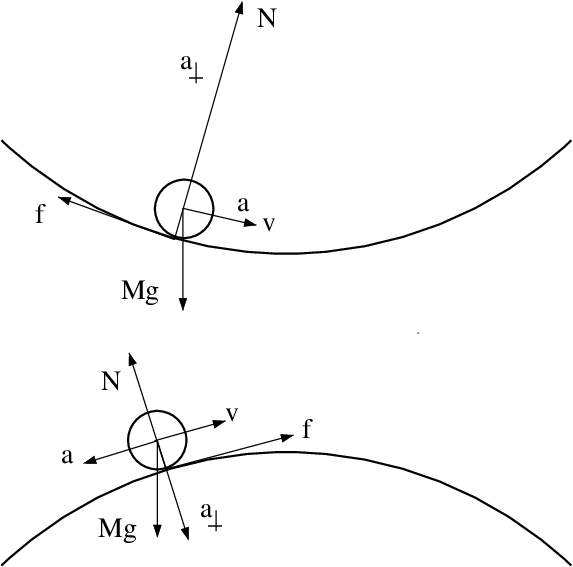

In [27]:
from IPython import display
display.Image("./krefter.png", width=400)

<b>Figur 1.</b> Kule som ruller på et krumt underlag. Her er $v$ kulas fart,
$a$ er baneakselerasjon, $a_\perp$ er sentripetalakselerasjon, $Mg$ er tyngdekraft,
$f$ er friksjonskraft og $N$ er normalkraft. Banens helningsvinkel $\beta$ er vinkelen mellom
positiv $x$-akse (horisontal og mot høyre) og retningen til $v$. <br><br>

## Baneform med kubiske *splines*

Baneformen fastlegges ved hjelp av tredjegradspolynomer på de 7 intervallene mellom de 8 tilfeldig valgte skruefestehøydene, slik at både banen $y(x)$, banens deriverte $dy/dx$ og banens andrederiverte $d^2y/dx^2$ er kontinuerlige i skruefestene. Dette gjøres i Python med funksjonen CubicSpline fra SciPy-biblioteket interpolate med kommandoen

*cs = CubicSpline(xfast,yfast,bc_type='natural')*

Her er xfast og yfast tabeller (numpy arrays) med henholdsvis horisontale og vertikale koordinater for skruefestene, og med *bc_type='natural'* velges krumning lik null i de to ytterste skruefestene. Horisontal avstand mellom skruefestene er 200 mm slik at xfast = (0,0.200,...,1.400) m. Vertikale koordinater for skruefestene fastlegges ved å trekke tilfeldige tall med numpy-funksjonen random.randint.


In [28]:
#Numerisk beregning og plotting av de fysiske størrelsene v(x), N(x), f(x), |f/N|, v(t), Epot(x), Ekin(x), Etot(x)
# Bakketoppens høyeste punkt (m):  0.243                                                     
# Banens laveste punkt (m):  0.165
# Helningsvinkel i startposisjonen (grader): -12.8
# Banens maksimale helningsvinkel (grader): 21.8
# De 8 festepunkthøydene (m): [0.3 0.246 0.175 0.176 0.227 0.239 0.198 0.196]
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

#Tallverdier. Tryggest med SI-enheter fra start til mål!
M = 0.031    #kg
g = 9.81     #m/s**2
c = 2/5
h = 0.200    #m
xfast=np.asarray([0,1,2,3,4,5,6,7])*h
xmin = 0
xmax = 1.401
dx = 0.001
x = np.arange(xmin, xmax, dx)
Nx = len(x)

#Skruehøyder:
yfast = np.zeros(8)
#yfast[0] = 0.300
#yfast[1] = yfast[0] - np.random.randint(40,60)/1000
#yfast[2] = yfast[1] - np.random.randint(70,90)/1000
#yfast[3] = yfast[2] + np.random.randint(-30,10)/1000
#yfast[4] = yfast[3] + np.random.randint(30,70)/1000
#yfast[5] = yfast[4] + np.random.randint(-20,20)/1000
#yfast[6] = yfast[5] - np.random.randint(40,80)/1000
#yfast[7] = yfast[6] + np.random.randint(-40,40)/1000

#Kjør denne cellen så mange ganger dere vil, inntil dere får en baneform dere er fornøyd med.
#Når endelig baneform er valgt:
#Sett inn skruehøydene med 3 desimaler (m) og fjern kommentarsymbolet ("#") i neste linje.
yfast = np.asarray([0.300,0.246,0.175,0.176,0.227,0.239,0.198,0.196])
#Når endelig baneform er valgt, kan dere gjerne legge inn # i starten på de 8 linjene som beregner yfast[] ovenfor

#Beregninger:
# CubicSpline tar inn de åtte festepunktene og interpolerer mellom dem slik at vi får en glatt kurve mellom festepunktene. 
# Den glatte kurven beskriver da posisjonen til kulen. Funksjonen som CubicSpline gir ut (her kalt cs) kan ta i mot et array med
# x-posisjoner som argument. Da vil den gi ut de tilsvarene y-posisjonene langs den glatte banen. 
cs = CubicSpline(xfast, yfast, bc_type='natural')
#y = baneformen y(x)
y = cs(x)
#dydx = dy/dx = y'(x) (dimensjonsløs)
dydx = cs(x,1)
#d2ydx2 = y''(x) (enhet 1/m)
d2ydx2 = cs(x,2)
#K = 1/R = banens krumning (1/m)
K = d2ydx2/(1+dydx**2)**(1.5)
#beta = banens helningsvinkel (rad)
beta = np.arctan(dydx)
#betadeg = banens helningsvinkel (grader)
betadeg = beta*180/np.pi
#startvinkel = helningsvinkel i startposisjonen (grader)
startvinkel = betadeg[0]
#maksvinkel = banens maksimale helningsvinkel, i absoluttverdi (grader)
maksvinkel = np.max(np.abs(betadeg))

y37 = y[400:1400]
y27 = y[200:1400]
y37min = np.min(y37)
y37max = np.max(y37)
y27min = np.min(y27)
y27max = np.max(y27)
print('Bakketoppens høyeste punkt (m): %6.3f' %y37max)
print('Banens laveste punkt (m): %6.3f' %y27min)
print('Helningsvinkel i startposisjonen (grader): %4.1f' %startvinkel)
print('Banens maksimale helningsvinkel (grader): %4.1f' %maksvinkel)
print('De 8 festepunkthøydene (m):', yfast)

Bakketoppens høyeste punkt (m):  0.243
Banens laveste punkt (m):  0.165
Helningsvinkel i startposisjonen (grader): -12.8
Banens maksimale helningsvinkel (grader): 21.8
De 8 festepunkthøydene (m): [0.3   0.246 0.175 0.176 0.227 0.239 0.198 0.196]


## Numerisk beregnede fysiske størrelser
*I neste celle skal dere beregne sentrale fysiske størrelser med utgangspunkt i den valgte baneformen. Fullfør cellen med nødvendig kode slik at de ulike størrelsene beregnes og plottes i pene figurer, i samme format som figurene ovenfor. Husk enhet på alle akser. Der flere kurver vises i samme figur må det framgå hva hver enkelt kurve framstiller. Følgende størrelser skal beregnes og plottes:*
* Beregn kulas hastighet v (m/s) og plott den mot horisontal posisjon $x$ (m): 
$$v(x)=\sqrt{\frac{10g[y(0)-y(x)]}{7}}$$
* Beregn tiden $t$ (s). Se eget teoridokument (finnes på nettsiden) om hvordan tiden kan beregnes. Plott deretter farten $v$ (m/s) mot tiden $t$ (s) og horisontal posisjon $x$ (m) mot tiden $t$ (s) i hvert sitt plott. <br>
* Beregn normalkraft $N$ og friksjonskraft $f$ (N) og plott dem i samme figur mot $x$ (m): <br>
$$N = Mg\cos\beta + M v^2K$$
$$f = \frac{2Mg\sin\beta}{7}$$
* Beregn forholdet $|f/N|$ og plott det mot $x$ (m). <br>
* Beregn potensiell energi, kinetisk energi (translasjonsenergi og rotasjonsenergi) og total energi (J) og plott de i samme figur mot horisontal posisjon $x$ (m). <br>

*Skriv til slutt ut tallverdier for kulas rulletid (s), slutthastighet (m/s) og tilhørende total mekanisk energi (J).* 

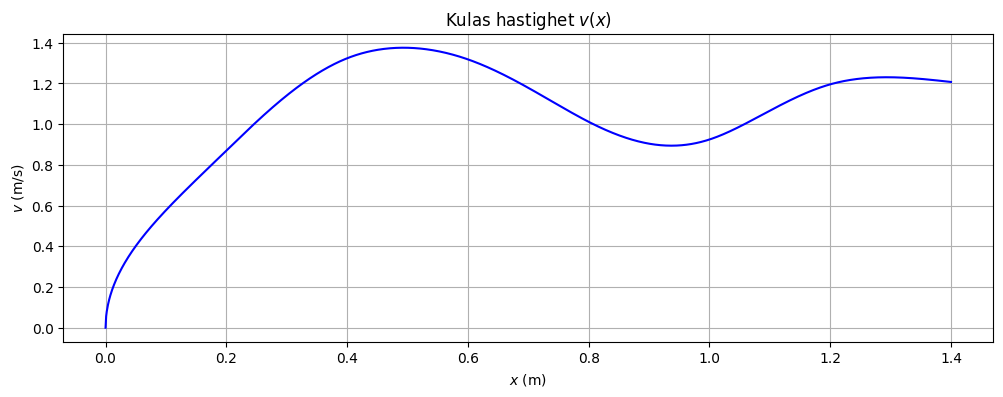

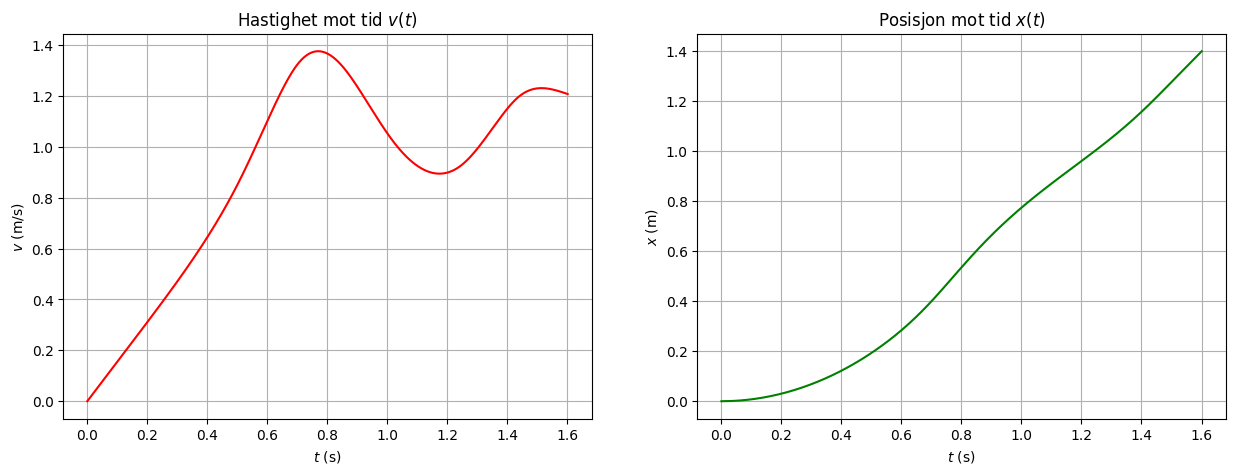

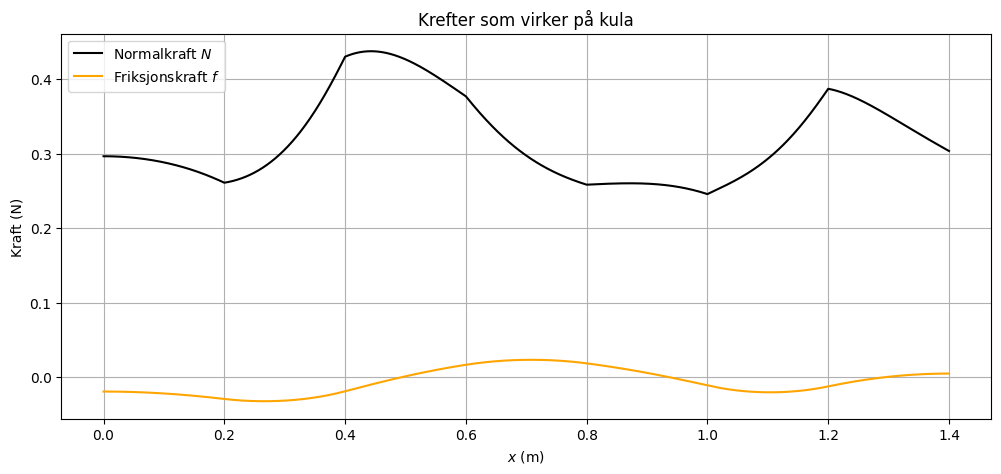

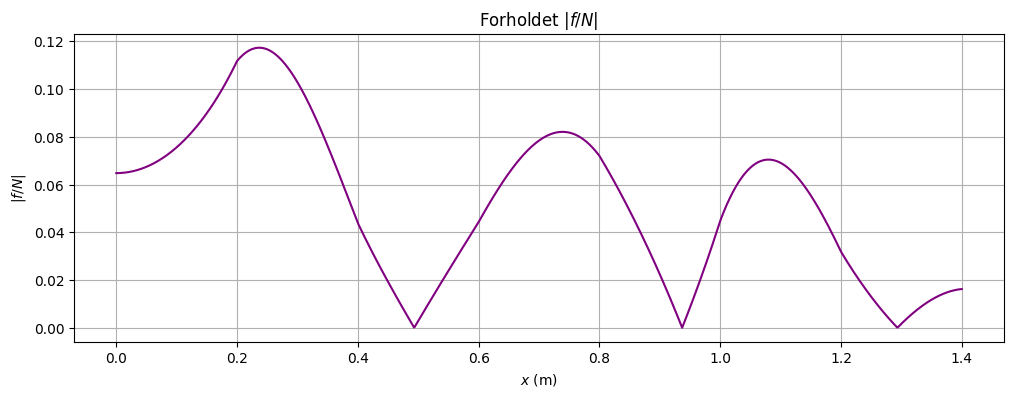

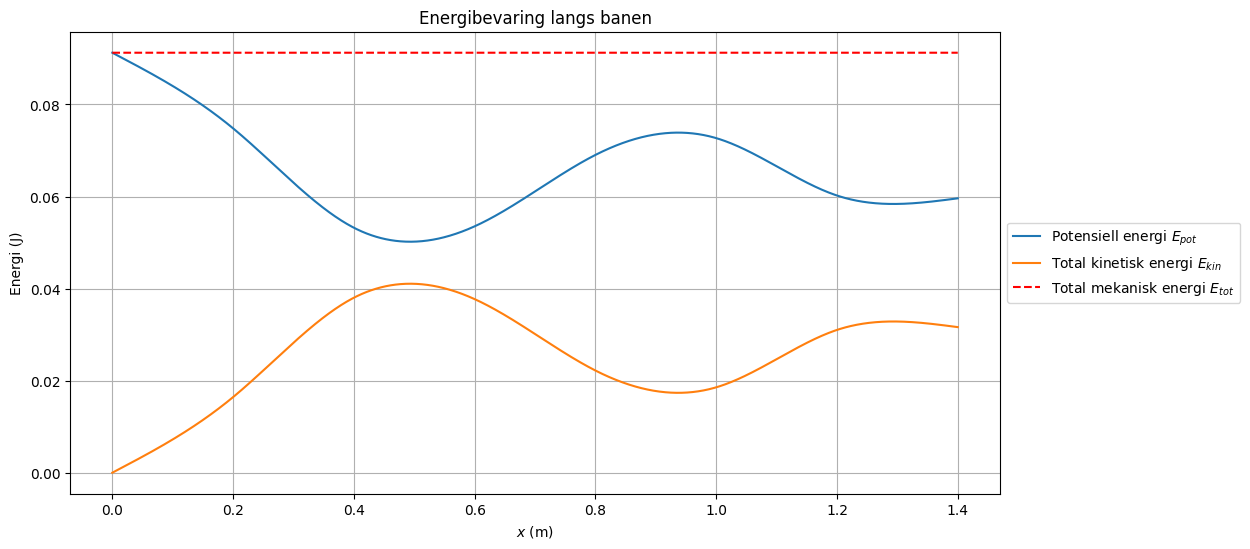

Kulas rulletid: 1.601s
Slutthastighet: 1.207m/s
Total mekanisk energi: 0.091J


In [29]:

# 1. Hastighet v(x) (Total fart langs banen)
v_total = np.sqrt((10 * g * (y[0] - y)) / 7)

# 2. Beregning av tid t(n)
vx = v_total * np.cos(beta)

# Beregner gjennomsnittlig vx mellom hvert punkt (1400 intervaller)
vx_avg = 0.5 * (vx[:-1] + vx[1:])

# dt = dx / vx_avg
dt = dx / vx_avg

# Kumulativ sum for å finne tidspunktene t0, t1, ..., t1400
t = np.zeros(Nx)
t[1:] = np.cumsum(dt)

# 3. Normalkraft N(x) og Friksjon f(x)
N = M * g * np.cos(beta) + M * v_total**2 * K

# f = (c / (1+c)) * mg sin(beta) -> For kule: (2/7) * mg sin(beta)
f = (2/7) * M * g * np.sin(beta)

# Forholdet |f/N|
f_over_N = np.abs(f / N)

# 4. Energier
E_pot = M * g * y
E_kin = 0.5 * M * v_total**2 * (1 + c)
E_tot = E_pot + E_kin

# Figur 1: Hastighet mot x
plt.figure(figsize=(12, 4))
plt.plot(x, v_total, label='$v(x)$', color='blue')
plt.title('Kulas hastighet $v(x)$')
plt.xlabel('$x$ (m)')
plt.ylabel('$v$ (m/s)')
plt.grid()
plt.show()

# Figur 2: v(t) og x(t)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(t, v_total, color='red')
ax1.set_title('Hastighet mot tid $v(t)$')
ax1.set_xlabel('$t$ (s)')
ax1.set_ylabel('$v$ (m/s)')
ax1.grid()

ax2.plot(t, x, color='green')
ax2.set_title('Posisjon mot tid $x(t)$')
ax2.set_xlabel('$t$ (s)')
ax2.set_ylabel('$x$ (m)')
ax2.grid()
plt.show()

# Figur 3: Krefter N(x) og f(x)
plt.figure(figsize=(12, 5))
plt.plot(x, N, label='Normalkraft $N$', color='black')
plt.plot(x, f, label='Friksjonskraft $f$', color='orange')
plt.title('Krefter som virker på kula')
plt.xlabel('$x$ (m)')
plt.ylabel('Kraft (N)')
plt.legend()
plt.grid()
plt.show()

# Figur 4: Friksjonsforhold |f/N|
plt.figure(figsize=(12, 4))
plt.plot(x, f_over_N, color='purple')
plt.title('Forholdet $|f/N|$')
plt.xlabel('$x$ (m)')
plt.ylabel('$|f/N|$')
plt.grid()
plt.show()

# Figur 5: Energier
plt.figure(figsize=(12, 6))
plt.plot(x, E_pot, label='Potensiell energi $E_{pot}$')
plt.plot(x, E_kin, label='Total kinetisk energi $E_{kin}$')
plt.plot(x, E_tot, '--', label='Total mekanisk energi $E_{tot}$', color='red')
plt.title('Energibevaring langs banen')
plt.xlabel('$x$ (m)')
plt.ylabel('Energi (J)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

print(f"Kulas rulletid: {t[-1]:.3f}s")
print(f"Slutthastighet: {v_total[-1]:.3f}m/s")
print(f"Total mekanisk energi: {E_tot[-1]:.3f}J")

## Numerisk vs eksperimentell bane

*Fra Tracker har dere eksportert eksperimentelle tallverdier for (t,x,y) til en tekstfil, f eks data.txt. Se eget dokument (finnes på nettsiden) om hvordan dere kan eksportere data fra Tracker. Legg til tekstfilen i samme mappe som notebooken. I neste celle skriver dere kode som leser innholdet i data.txt og oppretter numpy arrays for (t,x,y). Det holder å lese inn data fra <b>ett</b> rulleforsøk. Slik importeres semikolonseparerte data fra en tekstfil data.txt:*
```python
import pandas as pd
data=pd.read_csv("data.txt",sep=";")
t_exp=np.array(data["t"])
x_exp=np.array(data["x"])
y_exp=np.array(data["y"])
```
*t_exp, x_exp og y_exp er nå tabeller (numpy arrays) med de verdiene som ble vist i kolonnene i Tracker. Første linje i fila data.txt må være <br><br>
t;x;y <br><br>
Deretter følger tallverdier for t, x og y fra og med 2. linje, f eks <br><br>
0.300;0.0016;0.3001 <br>
0.334;0.0022;0.2995 <br>
... <br><br>
Lag en figur som viser både numerisk og eksperimentell bane, dvs y plottet mot x og y_exp plottet mot x_exp, i samme figur.* 

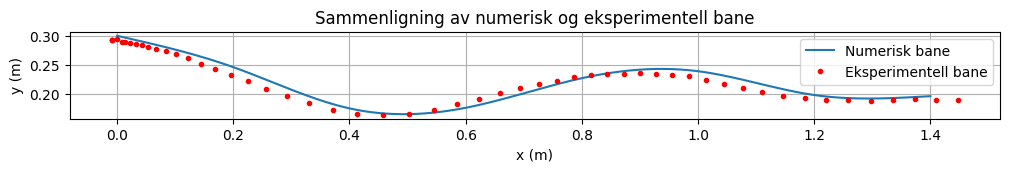

In [30]:
#Innlesing av eksperimentelle verdier for t, x og y


#Plotting av numerisk og eksperimentell bane

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("txy_1.txt", sep="	")
t_exp = np.array(data["t"])
x_exp = np.array(data["x"])
y_exp = np.array(data["y"])

plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Numerisk bane')
plt.plot(x_exp, y_exp, 'ro', label='Eksperimentell bane', markersize=3)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Sammenligning av numerisk og eksperimentell bane')
plt.legend()
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Numerisk vs eksperimentell hastighet

*I neste celle kan dere bruke numpyfunksjonen gradient til å beregne den eksperimentelle hastigheten til kula, både komponentene $v_x$ og $v_y$ og absoluttverdien $v = \sqrt{v_x^2+v_y^2}$. Tips:*
```python
vx_exp = np.gradient(x_exp,t_exp)
```
*På tilsvarende vis lages vy_exp, og deretter*
```python
v_exp = np.sqrt(vx_exp**2+vy_exp**2)
```
*Lag figurer som sammenligner numerisk og eksperimentell $v(x)$, $v(t)$ og $x(t)$. Det vil si plot numeriske og eksperimentelle størrelser i samme figur for hver av de tre størrelsene. Disse tre figurene gir et godt inntrykk av samsvaret mellom teoretisk og eksperimentell bevegelse.*

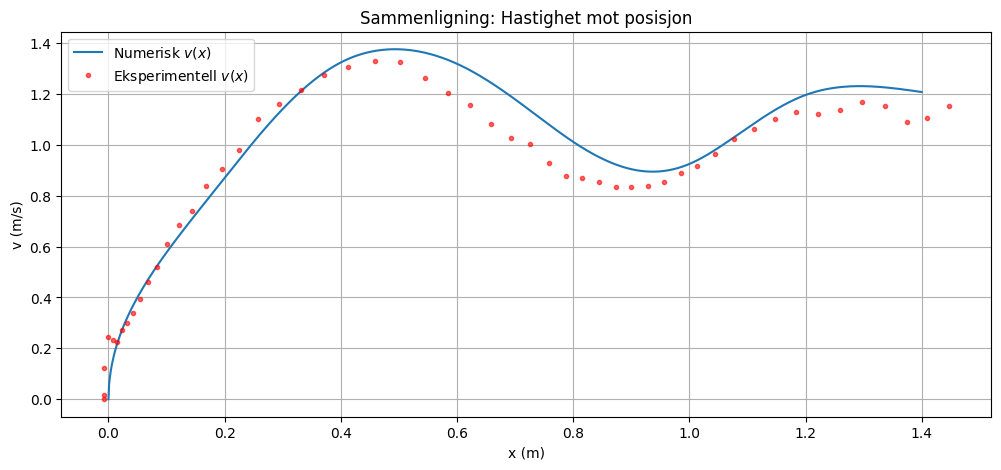

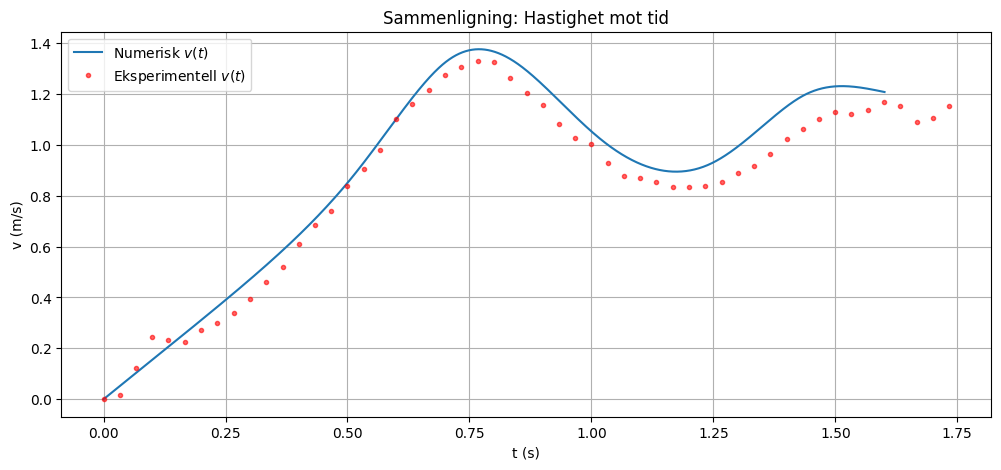

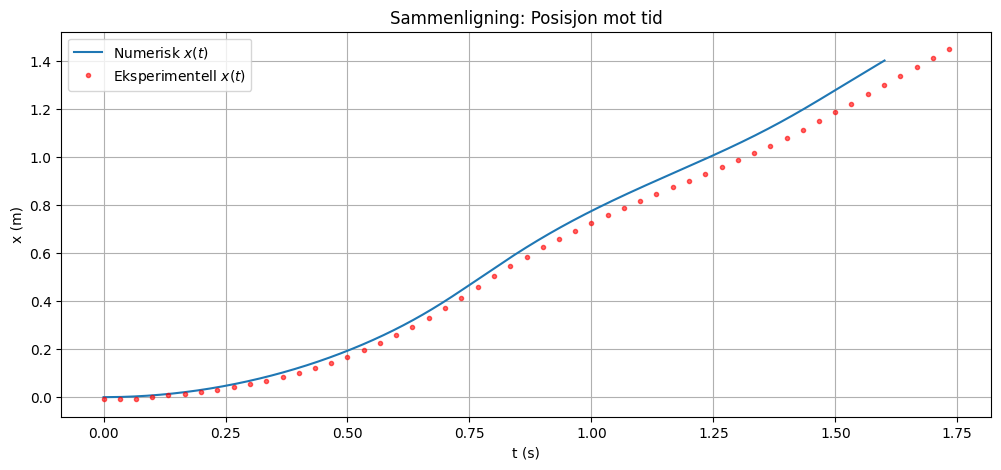

In [31]:

#Beregning av eksperimentell v_x, v_y og v

#Figurer som sammenligner numerisk og eksperimentell v(x), v(t) og x(t)

vx_exp = np.gradient(x_exp, t_exp)
vy_exp = np.gradient(y_exp, t_exp)
v_exp = np.sqrt(vx_exp**2 + vy_exp**2)

plt.figure(figsize=(12, 5))
plt.plot(x, v_total, label='Numerisk $v(x)$')
plt.plot(x_exp, v_exp, 'ro', label='Eksperimentell $v(x)$', markersize=3, alpha=0.6)
plt.xlabel('x (m)')
plt.ylabel('v (m/s)')
plt.title('Sammenligning: Hastighet mot posisjon')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(t, v_total, label='Numerisk $v(t)$')
plt.plot(t_exp, v_exp, 'ro', label='Eksperimentell $v(t)$', markersize=3, alpha=0.6)
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.title('Sammenligning: Hastighet mot tid')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(t, x, label='Numerisk $x(t)$')
plt.plot(t_exp, x_exp, 'ro', label='Eksperimentell $x(t)$', markersize=3, alpha=0.6)
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.title('Sammenligning: Posisjon mot tid')
plt.legend()
plt.grid()
plt.show()

## Numeriske vs eksperimentelle mekaniske energier

*I neste celle beregner dere eksperimentelle mekaniske energier: Kinetisk energi (translasjonsenergi og rotasjonsenergi), potensiell energi og total mekanisk energi. Sammenlign numerisk og eksperimentell total mekanisk, kinetisk og potensiell energi i en og samme figur (i alt 6 kurver). Husk å markere hvilken kurve som er hva.*

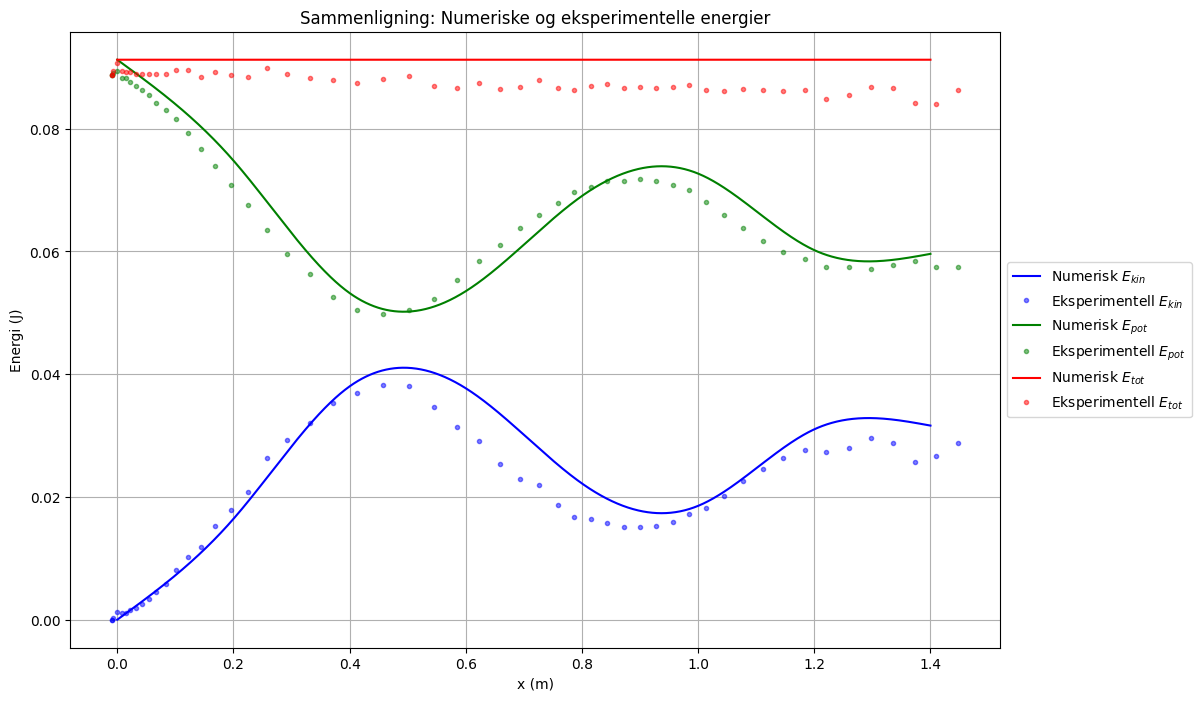

In [ ]:

#Beregning av eksperimentell Etrans_exp, Erot_exp, Ekin_exp, Epot_exp, Etot_exp

#Figurer som sammenligner numerisk og eksperimentell kinetisk, potensiell og total mekanisk energi


Etrans_exp = 0.5 * M * v_exp**2
Erot_exp = 0.5 * c * M * v_exp**2
Ekin_exp = Etrans_exp + Erot_exp
Epot_exp = M * g * y_exp
Etot_exp = Ekin_exp + Epot_exp

plt.figure(figsize=(12, 8))

plt.plot(x, E_kin, 'b-', label='Numerisk $E_{kin}$')
plt.plot(x_exp, Ekin_exp, 'b.', label='Eksperimentell $E_{kin}$', alpha=0.5)

plt.plot(x, E_pot, 'g-', label='Numerisk $E_{pot}$')
plt.plot(x_exp, Epot_exp, 'g.', label='Eksperimentell $E_{pot}$', alpha=0.5)

plt.plot(x, E_tot, 'r-', label='Numerisk $E_{tot}$')
plt.plot(x_exp, Etot_exp, 'r.', label='Eksperimentell $E_{tot}$', alpha=0.5)

plt.xlabel('x (m)')
plt.ylabel('Energi (J)')
plt.title('Sammenligning: Numeriske og eksperimentelle energier')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()





## Er den mekaniske energien bevart i rulleforsøkene?
*Fordel de 8 rulleforsøkene på gruppas medlemmer. For hvert rulleforsøk: Bruk posisjons- og fartsdata i start- og sluttpunktet fra Tracker til å beregne total mekanisk energi $E_i$ i startposisjonen (ved $x=0$) og $E_f$ i sluttposisjonen (ved $x=1.40$ m). I neste celle: Skriv de 8 verdiene for $E_i$ og $E_f$ inn i numpy arrays. Beregn 8 verdier for $\Delta E = E_i-E_f$ og deretter midlere tap i mekanisk energi med usikkerhet (den såkalte standardfeilen). Skriv ut resultatet på formen $\Delta E = (2.5 \pm 0.4)$ mJ, med egne tallverdier selvsagt. En passende enhet for $\Delta E$ er trolig mJ.*

In [37]:


#Beregning av Delta E = E_i - E_f for 8 vellykkede rulleforsøk

#Beregning av middelverdi og standardfeil for Delta E

#Utskrift av Delta E på formen Delta E = (Middelverdi +- Standardfeil) mJ
sluttfarter = np.array([1.114, 1.108, 1.151, 1.136, 1.143, 1.097, 1.212, 1.142])
Etrans_exp = 0.5 * M * sluttfarter**2
Erot_exp = 0.5 * c * M * sluttfarter**2
Ekin_exp = Etrans_exp + Erot_exp
Epot_exp = M * g * 0.196
Etot_exp = Ekin_exp + Epot_exp
Ef_list = Etot_exp

startfarter = np.array([0,0,0,0,0,0,0,0])
Etrans_exp = 0.5 * M * sluttfarter**2
Erot_exp = 0.5 * c * M * sluttfarter**2
Ekin_exp = Etrans_exp + Erot_exp
Epot_exp = M * g * 0.3
Etot_exp = Ekin_exp + Epot_exp
Ei_list = startfarter


deltaE = (Ei_list - Ef_list) * 1000

middelverdi = np.mean(deltaE)
standardavvik = np.std(deltaE, ddof=1)
standardfeil = standardavvik / np.sqrt(len(deltaE))

print(f"Delta E = ({middelverdi:.1f} +- {standardfeil:.1f}) mJ")

Delta E = (-87.7 +- 0.6) mJ


## Noen avsluttende spørsmål
*Referer til deres <b>egne plot og resultater, samt ligningene</b> dere har brukt i utregningene, når dere besvarer diskusjonsspørsmålene.*

*De første spørsmålene tar utgangspunkt i de teoretiske (numeriske) resultatene:* <br>
- Er grafen for $f(x)$ rimelig, med utgangspunkt i baneformen $y(x)$? Vurder spesielt topp- og bunnpunktene, samt fortegnet på $f(x)$ underveis langs banen.
- Er grafen for $N(x)$ rimelig, med utgangspunkt i baneformen $y(x)$? Vurder spesielt om $N$ har stor verdi på forventede steder.
- Maksimal statisk friksjonskraft er som kjent bestemt av $\mu_s N$. Hva må den statiske friksjonskoeffisienten $\mu_s$ mellom kule og bane minst være for at kula hele veien skal rulle rent uten å gli? Grafen for $|f(x)/N(x)|$ gir grunnlag for å svare på dette.
- Grafen for banens krumning $K(x)$ er kontinuerlig (sammenhengende), med tydelige knekkpunkter for hver 20. cm. Er dette som forventet? Forklar.
- I det teoretiske grunnlaget er det antatt at kulas radius er liten sammenlignet med banens krumningsradius. Er denne antagelsen i orden langs hele banen? Sammenlign kuleradien med banens minste krumningsradius.

*Det neste spørsmålet tar utgangspunkt i de eksperimentelle resultatene:*
- Er beregnet middelverdi og usikkerhet for tapt mekanisk energi i samsvar med antagelsen om at kula ruller rent uten å gli? I motsatt fall: Diskuter kort noen faktorer som kan bidra til at mekanisk energi går tapt i rulleforsøkene. <br>

*Det siste spørsmålet sammenligner de eksperimentelle resultatene med de teoretiske resultatene:* <br>
- Sammensvarer eksperimentelle og teoretiske resultater? Diskuter feilkilder som kan forklare forkjellene dere ser mellom deres eksperimentelle og teoretiske plot. Ta utgangspunkt i plottene for baneformen, hastighet og energi. I svaret deres referer til spesifikke steder langs banen (f. eks: ... ved x = 0.5 m ser vi at ...) der det er samsvar eller ikke samsvar mellom eksperimentene og numeriske beregninger. 
